<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Red neuronal aplicado al dataset WTA</header1></center>

##### Presentado por: Nathalia Marcela Martinez Vargas  <br>
Fecha: 5/2/2025

### Instalación de librerias

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install keras
!pip install tensorflow

### Importación de librerias

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, AdamW
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

### Cargar el dataset unificado

Se tiene en cuenta que este dataset es de un límite temporal desde 2010 hasta 2024 en donde la temporada ya se encuentra finalizada. Además, estos datos son para el circuito femenino.

In [3]:
url = 'https://raw.githubusercontent.com/Renegada99/AnalisisDatosTenis/refs/heads/main/WTA/dataFinalWTATransformado.csv'
df_WTA = pd.read_csv(url, sep=',')
df_WTA

,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,Best of,Winner,...,EXL,LBW,LBL,SJW,SJL,P_Total,R_Ajustado,P_Apuesta,E_Juegos,Ganador
0,1,Auckland,ASB Classic,31/12/2023,WTA250,Outdoor,Hard,1st Round,3.0,Wang Xiy.,...,0.0,0.0,0.0,0.0,0.0,240.0,0.815155,0.050000,1.276596,1
1,1,Auckland,ASB Classic,1/01/2024,WTA250,Outdoor,Hard,1st Round,3.0,Avanesyan E.,...,0.0,0.0,0.0,0.0,0.0,250.0,0.114004,0.050000,1.604938,1
2,1,Auckland,ASB Classic,1/01/2024,WTA250,Outdoor,Hard,1st Round,3.0,Navarro E.,...,0.0,0.0,0.0,0.0,0.0,220.0,0.351873,0.050000,1.157025,1
3,1,Auckland,ASB Classic,1/01/2024,WTA250,Outdoor,Hard,1st Round,3.0,Tsurenko L.,...,0.0,0.0,0.0,0.0,0.0,240.0,0.223620,0.050000,1.428571,1
4,1,Auckland,ASB Classic,1/01/2024,WTA250,Outdoor,Hard,1st Round,3.0,Parry D.,...,0.0,0.0,0.0,0.0,0.0,240.0,0.834248,0.050000,1.258278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35572,57,Bali,Commonwealth Bank Tournament of Champions,5/11/2010,International,Indoor,Hard,Quarterfinals,3.0,Hantuchova D.,...,0.0,2.0,0.0,0.0,0.0,230.0,1.402715,0.045455,1.287129,1
35573,57,Bali,Commonwealth Bank Tournament of Champions,6/11/2010,International,Indoor,Hard,Semifinals,3.0,Ivanovic A.,...,0.0,0.0,5.0,0.0,0.0,250.0,0.451977,0.050000,1.347518,1
35574,57,Bali,Commonwealth Bank Tournament of Champions,6/11/2010,International,Indoor,Hard,Semifinals,3.0,Kleybanova A.,...,0.0,0.0,0.0,0.0,0.0,280.0,0.868167,0.050000,2.926829,1
35575,57,Bali,Commonwealth Bank Tournament of Champions,7/11/2010,International,Indoor,Hard,Third Place,3.0,Date Krumm K.,...,0.0,0.0,0.0,0.0,0.0,240.0,1.704180,0.045455,1.386139,1


In [5]:
# Verificar que las métricas existan en el dataset
required_columns = [
    'P_Total', 'R_Ajustado', 'E_Juegos', 
    'P_Apuesta', 'WRank', 'LRank', 'WPts', 'LPts', 'Ganador'
]
for column in required_columns:
    if column not in df_WTA.columns:
        raise ValueError(f"La columna {column} no se encuentra en el dataset.")

In [6]:
# Seleccionar características y objetivo
features = [
    'P_Total', 'R_Ajustado', 'E_Juegos', 
    'P_Apuesta', 'WRank', 'LRank', 'WPts', 'LPts'
]
X = df_WTA[features]
y = df_WTA['Ganador']  # Columna binaria o categórica que indica el ganador

In [7]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar los tamaños de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:\n", X_train.shape[0], "Instancias\n", X_train.shape[1], "Variables de entrada")
print("Tamaño del conjunto de prueba:\n", X_test.shape[0], "Instancias\n", X_test.shape[1], "Variables de entrada")

Tamaño del conjunto de entrenamiento:
 28461 Instancias
 8 Variables de entrada
Tamaño del conjunto de prueba:
 7116 Instancias
 8 Variables de entrada


In [8]:
# Verificar NaN e inf en X_train
print("Valores NaN en X_train:\n", X_train.isna().sum())
print("Valores infinitos en X_train:\n", X_train.replace([np.inf, -np.inf], np.nan).isna().sum())

# Verificar NaN e inf en X_test
print("Valores NaN en X_test:\n", X_test.isna().sum())
print("Valores infinitos en X_test:\n", X_test.replace([np.inf, -np.inf], np.nan).isna().sum())

Valores NaN en X_train:
 P_Total       0
R_Ajustado    0
E_Juegos      0
P_Apuesta     0
WRank         0
LRank         0
WPts          0
LPts          0
dtype: int64
Valores infinitos en X_train:
 P_Total         0
R_Ajustado      0
E_Juegos        0
P_Apuesta     372
WRank           0
LRank           0
WPts            0
LPts            0
dtype: int64
Valores NaN en X_test:
 P_Total       0
R_Ajustado    0
E_Juegos      0
P_Apuesta     0
WRank         0
LRank         0
WPts          0
LPts          0
dtype: int64
Valores infinitos en X_test:
 P_Total        0
R_Ajustado     0
E_Juegos       0
P_Apuesta     85
WRank          0
LRank          0
WPts           0
LPts           0
dtype: int64


In [13]:
# Reemplazar NaN y valores infinitos por la media de cada columna
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())

X_train['P_Apuesta'] = X_train['P_Apuesta'].replace(np.inf, X_train['P_Apuesta'][np.isfinite(X_train['P_Apuesta'])].max())
X_train['P_Apuesta'] = X_train['P_Apuesta'].replace(-np.inf, X_train['P_Apuesta'][np.isfinite(X_train['P_Apuesta'])].min())


In [14]:
print("Valores máximos en X_train:\n", X_train.max())
print("Valores mínimos en X_train:\n", X_train.min())

Valores máximos en X_train:
 P_Total          340.0
R_Ajustado      9800.0
E_Juegos         120.0
P_Apuesta          0.5
WRank          12080.0
LRank          18760.0
WPts          136150.0
LPts          136150.0
dtype: float64
Valores mínimos en X_train:
 P_Total      -90.000000
R_Ajustado     0.000000
E_Juegos       0.000000
P_Apuesta      0.013333
WRank          0.000000
LRank          0.000000
WPts           0.000000
LPts           0.000000
dtype: float64


In [15]:
# Reemplazar valores infinitos por el valor máximo finito de la columna
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())

X_test['P_Apuesta'] = X_test['P_Apuesta'].replace(np.inf, X_test['P_Apuesta'][np.isfinite(X_test['P_Apuesta'])].max())
X_test['P_Apuesta'] = X_test['P_Apuesta'].replace(-np.inf, X_test['P_Apuesta'][np.isfinite(X_test['P_Apuesta'])].min())

In [16]:
print("Valores máximos después de reemplazar infinitos:\n", X_train.max())
print("Valores mínimos después de reemplazar infinitos:\n", X_train.min())
print("Valores máximos después de reemplazar infinitos:\n", X_test.max())
print("Valores mínimos después de reemplazar infinitos:\n", X_test.min())

Valores máximos después de reemplazar infinitos:
 P_Total          340.0
R_Ajustado      9800.0
E_Juegos         120.0
P_Apuesta          0.5
WRank          12080.0
LRank          18760.0
WPts          136150.0
LPts          136150.0
dtype: float64
Valores mínimos después de reemplazar infinitos:
 P_Total      -90.000000
R_Ajustado     0.000000
E_Juegos       0.000000
P_Apuesta      0.013333
WRank          0.000000
LRank          0.000000
WPts           0.000000
LPts           0.000000
dtype: float64
Valores máximos después de reemplazar infinitos:
 P_Total          320.0
R_Ajustado      1570.0
E_Juegos         120.0
P_Apuesta          0.5
WRank           9800.0
LRank          15040.0
WPts          136150.0
LPts          131610.0
dtype: float64
Valores mínimos después de reemplazar infinitos:
 P_Total      -40.000000
R_Ajustado     0.000000
E_Juegos       0.000000
P_Apuesta      0.007463
WRank          0.000000
LRank          0.000000
WPts           0.000000
LPts           0.000000
dty

In [17]:
# Escalar los datos
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Escalar las variables objetivo (asegúrate de usar el mismo scaler o un scaler separado para las etiquetas)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [24]:
"""
# Modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]  # Agregar EarlyStopping
)

# Evaluación del modelo
results = model.evaluate(X_test, y_test)

# Acceso a los resultados
loss = results[0]  # Loss es el primer valor
accuracy = results[1]  # Accuracy es el segundo valor

# Imprimir los resultados
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

"""
# Modelo de red neuronal mejorado
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación del modelo con AdamW
model.compile(optimizer=AdamW(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping con 'val_accuracy'
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitorear la precisión en validación
    patience=8,  # Mayor paciencia para evitar detenerse demasiado pronto
    restore_best_weights=True,
    verbose=1
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Más épocas para mejor convergencia
    batch_size=64,  # Mayor batch size para estabilidad
    callbacks=[early_stopping],
    verbose=1
)

# Evaluación del modelo
results = model.evaluate(X_test, y_test)

# Acceso a los resultados
loss = results[0]  # Loss es el primer valor
accuracy = results[1]  # Accuracy es el segundo valor

# Imprimir los resultados
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")


Epoch 1/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9188 - loss: 0.2343 - val_accuracy: 0.9809 - val_loss: 0.0952
Epoch 2/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.1137 - val_accuracy: 0.9809 - val_loss: 0.0921
Epoch 3/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.1055 - val_accuracy: 0.9809 - val_loss: 0.0846
Epoch 4/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9794 - loss: 0.0828 - val_accuracy: 0.9809 - val_loss: 0.0545
Epoch 5/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0596 - val_accuracy: 0.9861 - val_loss: 0.0405
Epoch 6/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 7/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0390 - val_accuracy: 0.9947 - val_loss: 0.0180
Epoch 8/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0365 - val_accu

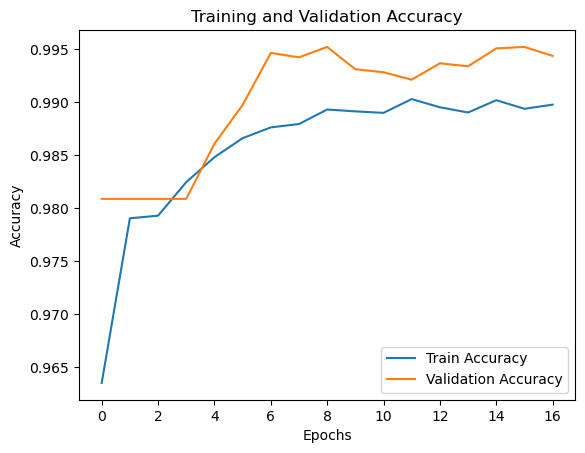

In [25]:
# Visualizar la precisión del entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()